# Complex Formula 1 circuit

In [1]:
%matplotlib inline

import cvxpy as cvx
import dccp
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Defining the scene

In [11]:
a, b, c, d, e, f, g = np.array([0.5, 0.]), np.array([1., 0.5]), np.array([1., 1.5]), np.array([0., 1.5]), np.array([-0.35, 0.65]), np.array([-0.35, 0.35]), np.array([0., -0.5])
p1, p2, p3, p4, p5, p6, p7 = np.array([1., 0.]), np.array([1., 1.]), _, np.array([0., 1.]), np.array([-0.83, 0.5]), np.array([0., 0.]), np.array([0., 0.])

obstacles = []
r1, r2 = 0.55, 0.45
dx = 0.05

n1, n2, n3, n4, n5, n6, n7 = 50, 80, 50, 50, 30, 30, 80


In [12]:
x1 = cvx.Variable((n1+1, 2))
x2 = cvx.Variable((n2+1, 2))
x3 = cvx.Variable((n3+1, 2))
x4 = cvx.Variable((n4+1, 2))
x5 = cvx.Variable((n5+1, 2))
x6 = cvx.Variable((n6+1, 2))
x7 = cvx.Variable((n7+1, 2))

b = cvx.Variable(2)
c = cvx.Variable(2)
d = cvx.Variable(2)
e = cvx.Variable(2)
f = cvx.Variable(2)
g = cvx.Variable(2)

In [13]:
constr = [x1[0] == a, x1[n1] == b, x2[0] == b, x2[n2] == c, x3[0] == c, x3[n3] == d, x4[0] == d, x4[n4] == e, x5[0] == e, x5[n5] == f, x6[0] == f, x6[n6] == g, x7[0] == g, x7[n7] == a]
constr.extend([b[0] == 1., c[0] == 1., d[0] == 0., e[1] == 0.65, f[1] == 0.35, g[1] == 0.])

v1 = x1[1:] - x1[:-1]
v2 = x2[1:] - x2[:-1]
v3 = x3[1:] - x3[:-1]
v4 = x4[1:] - x4[:-1]
v5 = x5[1:] - x5[:-1]
v6 = x6[1:] - x6[:-1]
v7 = x7[1:] - x7[:-1]

for i in range(1, n1+1):
    constr.append(cvx.norm(v1[i-1]) <= dx)
    constr.append(cvx.norm(x1[i] - p1) <= r1)
    constr.append(cvx.norm(x1[i] - p1) >= r2)

constr.append(x2[:, 0] >= 1)
for i in range(1, n2+1):
    constr.append(cvx.norm(v2[i-1]) <= dx)
    constr.append(cvx.norm(x2[i] - p2) >= (1-r1))
    constr.append(cvx.norm(x2[i] - p2) <= (1-r2))

for i in range(1, n3+1):
    constr.append(cvx.norm(v3[i-1]) <= dx)
    constr.append(x3[i,1] >= (2-r1))
    constr.append(x3[i,1] <= (2-r2))

for i in range(1, n4+1):
    constr.append(cvx.norm(v4[i-1]) <= dx)
    constr.append(cvx.norm(x4[i] - p4) >= (1-r1))
    constr.append(cvx.norm(x4[i] - p4) <= (1-r2))

for i in range(1, n5+1):
    constr.append(cvx.norm(v5[i-1]) <= dx)
    constr.append(cvx.norm(x5[i] - p5) <= r1)
    constr.append(cvx.norm(x5[i] - p5) >= r2)

for i in range(1, n6+1):
    constr.append(cvx.norm(v6[i-1]) <= dx)
    constr.append(cvx.norm(x6[i] - p6) >= (1-r1))
    constr.append(cvx.norm(x6[i] - p6) <= (1-r2))
    
constr.append(x7[:, 1] <= 0.)
for i in range(1, n7+1):
    constr.append(cvx.norm(v7[i-1]) <= dx)
    constr.append(cvx.norm(x7[i] - p7) >= (1-r1))
    constr.append(cvx.norm(x7[i] - p7) <= (1-r2))

In [14]:
total_v = cvx.norm(v1, "fro") + cvx.norm(v2, "fro") + cvx.norm(v3, "fro") + cvx.norm(v4, "fro") + cvx.norm(v5, "fro") + cvx.norm(v6, "fro") + cvx.norm(v7, "fro")

prob = cvx.Problem(cvx.Minimize(total_v), constr)
prob.is_dcp()

False

In [15]:
prob.solve(method="dccp");

In [16]:
traj = np.r_[x1.value, x2.value, x3.value, x4.value, x5.value, x6.value, x7.value]
traj

array([[ 5.00000000e-01, -2.79027938e-17],
       [ 5.06375005e-01,  1.31623911e-02],
       [ 5.12750010e-01,  2.63247822e-02],
       [ 5.19125015e-01,  3.94871733e-02],
       [ 5.25500020e-01,  5.26495644e-02],
       [ 5.31875025e-01,  6.58119555e-02],
       [ 5.38250031e-01,  7.89743466e-02],
       [ 5.44625036e-01,  9.21367377e-02],
       [ 5.51000041e-01,  1.05299129e-01],
       [ 5.57375046e-01,  1.18461520e-01],
       [ 5.63750051e-01,  1.31623911e-01],
       [ 5.70125056e-01,  1.44786302e-01],
       [ 5.76500061e-01,  1.57948693e-01],
       [ 5.82875066e-01,  1.71111084e-01],
       [ 5.89250071e-01,  1.84273475e-01],
       [ 5.95625077e-01,  1.97435866e-01],
       [ 6.02255305e-01,  2.10473650e-01],
       [ 6.09305759e-01,  2.23289073e-01],
       [ 6.16768991e-01,  2.35868594e-01],
       [ 6.24637117e-01,  2.48198925e-01],
       [ 6.32901826e-01,  2.60267038e-01],
       [ 6.41554386e-01,  2.72060181e-01],
       [ 6.50585658e-01,  2.83565896e-01],
       [ 6.

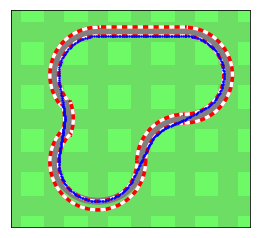

In [17]:
r_center = (r1 + r2) / 2

theta1 = np.linspace(np.pi/2, np.pi, 500)
theta2 = np.linspace(-np.pi/2, np.pi/2, 1000)
x3 = np.linspace(1., 0., 1000)
theta4 = np.linspace(np.pi/2, 5/4*np.pi, 750)
theta5 = np.linspace(-np.pi/9, np.pi/9, 500)
theta6 = np.linspace(-5/4*np.pi, 0., 1000)

road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

road2_top_x, road2_top_y = 1 + (1-r1) * np.cos(theta2), 1 + (1-r1) * np.sin(theta2)
road2_center_x, road2_center_y = 1 + (1-r_center) * np.cos(theta2), 1 + (1-r_center) * np.sin(theta2)
road2_bottom_x, road2_bottom_y = 1 + (1-r2) * np.cos(theta2),1 + (1-r2) * np.sin(theta2)

road3_top_y = np.ones(1000) * (2 - r1)
road3_center_y = np.ones(1000) * (2 - r_center)
road3_bottom_y = np.ones(1000) * (2 - r2)

road4_top_x, road4_top_y = 0. + (1-r1) * np.cos(theta4), 1 + (1-r1) * np.sin(theta4)
road4_center_x, road4_center_y = 0. + (1-r_center) * np.cos(theta4), 1 + (1-r_center) * np.sin(theta4)
road4_bottom_x, road4_bottom_y = 0. + (1-r2) * np.cos(theta4), 1 + (1-r2) * np.sin(theta4)

road5_top_x, road5_top_y = -0.83 + r1 * np.cos(theta5), 0.5 + r1 * np.sin(theta5)
road5_center_x, road5_center_y = -0.83 + r_center * np.cos(theta5), 0.5 + r_center * np.sin(theta5)
road5_bottom_x, road5_bottom_y = -0.83 + r2 * np.cos(theta5), 0.5 + r2 * np.sin(theta5)

road6_top_x, road6_top_y = (1-r1) * np.cos(theta6), (1-r1) * np.sin(theta6)
road6_center_x, road6_center_y = (1-r_center) * np.cos(theta6), (1-r_center) * np.sin(theta6)
road6_bottom_x, road6_bottom_y = (1-r2) * np.cos(theta6), (1-r2) * np.sin(theta6)

plt.plot(road_center_x, road_center_y, "grey", linewidth=7);
plt.plot(road_top_x, road_top_y, "r", linewidth=3.5);
plt.plot(road_top_x, road_top_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));
plt.plot(road_bottom_x, road_bottom_y, "r", linewidth=3.5);
plt.plot(road_bottom_x, road_bottom_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));

plt.plot(road2_center_x, road2_center_y, "grey", linewidth=7);
plt.plot(road2_top_x, road2_top_y, "r", linewidth=3.5);
plt.plot(road2_top_x, road2_top_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));
plt.plot(road2_bottom_x, road2_bottom_y, "r", linewidth=3.5);
plt.plot(road2_bottom_x, road2_bottom_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));

plt.plot(x3, road3_center_y, "grey", linewidth=7);
plt.plot(x3, road3_top_y, "r", linewidth=3.5);
plt.plot(x3, road3_top_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));
plt.plot(x3, road3_bottom_y, "r", linewidth=3.5);
plt.plot(x3, road3_bottom_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));

plt.plot(road4_center_x, road4_center_y, "grey", linewidth=7);
plt.plot(road4_top_x, road4_top_y, "r", linewidth=3.5);
plt.plot(road4_top_x, road4_top_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));
plt.plot(road4_bottom_x, road4_bottom_y, "r", linewidth=3.5);
plt.plot(road4_bottom_x, road4_bottom_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));

plt.plot(road5_center_x, road5_center_y, "grey", linewidth=7);
plt.plot(road5_top_x, road5_top_y, "r", linewidth=3.5);
plt.plot(road5_top_x, road5_top_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));
plt.plot(road5_bottom_x, road5_bottom_y, "r", linewidth=3.5);
plt.plot(road5_bottom_x, road5_bottom_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));

plt.plot(road6_center_x, road6_top_y, "grey", linewidth=7);
plt.plot(road6_top_x, road6_top_y, "r", linewidth=3.5);
plt.plot(road6_top_x, road6_top_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));
plt.plot(road6_bottom_x, road6_bottom_y, "r", linewidth=3.5);
plt.plot(road6_bottom_x, road6_bottom_y, "w--", linewidth=3.5,  dashes=(1.5, 1.5));

for o, r in obstacles:
    circle = plt.Circle(o, r, color='orange')
    plt.gca().add_artist(circle)


plt.scatter(traj[:, 0], traj[:, 1], color="b", s=2, zorder=10)

plt.gca().set_facecolor((0.43, 0.98, 0.4))
plt.grid(True, color=(0.42, 0.87, 0.39), linewidth=20)
plt.axis('scaled')
plt.xlim(-1, 1.75);
plt.ylim(-0.75, 1.75);
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().tick_params(tick1On=False)

## Plotting the circuit

In [8]:
a, b, c, d, e, f, g = np.array([0.5, 0.]), np.array([1., 0.5]), np.array([1., 1.5]), np.array([0., 1.5]), np.array([-0.35, 0.65]), np.array([-0.35, 0.35]), np.array([0., -0.5])
p1, p2, p3, p4, p5, p6, p7 = np.array([1., 0.]), np.array([1., 1.]), _, np.array([0., 1.]), np.array([-0.83, 0.5]), np.array([0., 0.]), np.array([0., 0.])

obstacles = []
r1, r2 = 0.55, 0.45
dx = 0.05

n1, n2, n3, n4, n5, n6, n7 = 50, 80, 50, 50, 30, 30, 80

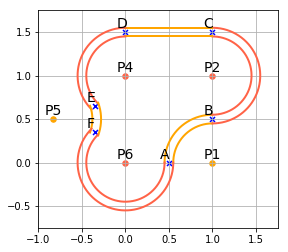

In [9]:
r_center = (r1 + r2) / 2

theta1 = np.linspace(np.pi/2, np.pi, 500)
theta2 = np.linspace(-np.pi/2, np.pi/2, 1000)
x3 = np.linspace(1., 0., 1000)
theta4 = np.linspace(np.pi/2, 5/4*np.pi, 750)
theta5 = np.linspace(-np.pi/9, np.pi/9, 500)
theta6 = np.linspace(-5/4*np.pi, 0., 1000)

road_top_x, road_top_y = 1 + r1 * np.cos(theta1), r1 * np.sin(theta1)
road_center_x, road_center_y = 1 + r_center * np.cos(theta1), r_center * np.sin(theta1)
road_bottom_x, road_bottom_y = 1 + r2 * np.cos(theta1), r2 * np.sin(theta1)

road2_top_x, road2_top_y = 1 + (1-r1) * np.cos(theta2), 1 + (1-r1) * np.sin(theta2)
road2_center_x, road2_center_y = 1 + (1-r_center) * np.cos(theta2), 1 + (1-r_center) * np.sin(theta2)
road2_bottom_x, road2_bottom_y = 1 + (1-r2) * np.cos(theta2),1 + (1-r2) * np.sin(theta2)

road3_top_y = np.ones(1000) * (2 - r1)
road3_center_y = np.ones(1000) * (2 - r_center)
road3_bottom_y = np.ones(1000) * (2 - r2)

road4_top_x, road4_top_y = 0. + (1-r1) * np.cos(theta4), 1 + (1-r1) * np.sin(theta4)
road4_center_x, road4_center_y = 0. + (1-r_center) * np.cos(theta4), 1 + (1-r_center) * np.sin(theta4)
road4_bottom_x, road4_bottom_y = 0. + (1-r2) * np.cos(theta4), 1 + (1-r2) * np.sin(theta4)

road5_top_x, road5_top_y = -0.83 + r1 * np.cos(theta5), 0.5 + r1 * np.sin(theta5)
road5_center_x, road5_center_y = -0.83 + r_center * np.cos(theta5), 0.5 + r_center * np.sin(theta5)
road5_bottom_x, road5_bottom_y = -0.83 + r2 * np.cos(theta5), 0.5 + r2 * np.sin(theta5)

road6_top_x, road6_top_y = (1-r1) * np.cos(theta6), (1-r1) * np.sin(theta6)
road6_center_x, road6_center_y = (1-r_center) * np.cos(theta6), (1-r_center) * np.sin(theta6)
road6_bottom_x, road6_bottom_y = (1-r2) * np.cos(theta6), (1-r2) * np.sin(theta6)


plt.plot(road_top_x, road_top_y, "orange", linewidth=2);
plt.plot(road_bottom_x, road_bottom_y, "orange", linewidth=2);

plt.plot(road2_top_x, road2_top_y, "tomato", linewidth=2);
plt.plot(road2_bottom_x, road2_bottom_y, "tomato", linewidth=2);

plt.plot(x3, road3_top_y, "orange", linewidth=2);
plt.plot(x3, road3_bottom_y, "orange", linewidth=2);

plt.plot(road4_top_x, road4_top_y, "tomato", linewidth=2);
plt.plot(road4_bottom_x, road4_bottom_y, "tomato", linewidth=2);

plt.plot(road5_top_x, road5_top_y, "orange", linewidth=2);
plt.plot(road5_bottom_x, road5_bottom_y, "orange", linewidth=2);

plt.plot(road6_top_x, road6_top_y, "tomato", linewidth=2);
plt.plot(road6_bottom_x, road6_bottom_y, "tomato", linewidth=2);

delta = 0.05
plt.scatter(a[0], a[1], s=25, color="blue", marker="x")
plt.text(a[0]-2*delta, a[1]+delta, "A", fontsize=14)

plt.scatter(b[0], b[1], s=25, color="blue", marker="x")
plt.text(b[0]-2*delta, b[1]+delta, "B", fontsize=14)

plt.scatter(c[0], c[1], s=25, color="blue", marker="x")
plt.text(c[0]-2*delta, c[1]+delta, "C", fontsize=14)

plt.scatter(d[0], d[1], s=25, color="blue", marker="x")
plt.text(d[0]-2*delta, d[1]+delta, "D", fontsize=14)

plt.scatter(e[0], e[1], s=25, color="blue", marker="x")
plt.text(e[0]-2*delta, e[1]+delta, "E", fontsize=14)

plt.scatter(f[0], f[1], s=25, color="blue", marker="x")
plt.text(f[0]-2*delta, f[1]+delta, "F", fontsize=14)


plt.scatter(p1[0], p1[1], s=30, color="orange")
plt.text(p1[0]-2*delta, p1[1]+delta, "P1", fontsize=14)

plt.scatter(p2[0], p2[1], s=30, color="tomato")
plt.text(p2[0]-2*delta, p2[1]+delta, "P2", fontsize=14)

plt.scatter(p4[0], p4[1], s=30, color="tomato")
plt.text(p4[0]-2*delta, p4[1]+delta, "P4", fontsize=14)

plt.scatter(p5[0], p5[1], s=30, color="orange")
plt.text(p5[0]-2*delta, p5[1]+delta, "P5", fontsize=14)

plt.scatter(p6[0], p6[1], s=30, color="tomato")
plt.text(p6[0]-2*delta, p6[1]+delta, "P6", fontsize=14)

plt.grid(True)
plt.axis('scaled')
plt.xlim(-1, 1.75);
plt.ylim(-0.75, 1.75);